In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
from PIL import Image
from numpy import asarray
import pandas as pd
import pickle
import time

In [ ]:
# Formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

In [ ]:
ROOT_DIR = "drive/MyDrive/GANProject_2023"
TEXT_DIR = f"{ROOT_DIR}/data/descriptions.txt"
IMG_DIR = f"{ROOT_DIR}/data/images"

In [ ]:
images_path = []
for image in os.listdir(IMG_DIR):
  images = os.path.join(IMG_DIR, image)
  images_path.append(images)    

In [ ]:
images_path.sort()

In [ ]:
images = []

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# loop through each image in the folder
for filename in images_path[:5005]:
    # load the image
    img = Image.open(filename)

    # rescale image to 64x64 pixel
    resized_image = img.resize((64, 64))

    # Convert the image to a numpy array
    img_array = np.asarray(resized_image)

    # normalize the image
    img_norm = img_array / 255.0
    
    # add the normalized image to the list
    images.append(img_norm)

In [ ]:
len(images)

5005

### Note for text captions: [436, 1355, 3624, 3644, 3775]

# Error Handling in images

In [ ]:
false_index = []
for i, image in enumerate(images):
  if image.shape != (64,64,3):
    false_index.append(i)

In [ ]:
false_index

[436, 1355, 3624, 3644, 3775]

In [ ]:
images.pop(436)

array([[0.78823529, 0.79215686, 0.79607843, ..., 0.77647059, 0.77254902,
        0.77254902],
       [0.77647059, 0.78039216, 0.78039216, ..., 0.77254902, 0.77254902,
        0.76862745],
       [0.76862745, 0.77254902, 0.77254902, ..., 0.77254902, 0.77254902,
        0.76862745],
       ...,
       [0.50196078, 0.51764706, 0.54509804, ..., 0.43137255, 0.43921569,
        0.43921569],
       [0.21176471, 0.27058824, 0.29411765, ..., 0.40392157, 0.41176471,
        0.4       ],
       [0.14509804, 0.18431373, 0.19215686, ..., 0.41176471, 0.43921569,
        0.41960784]])

In [ ]:
len(images)

5000

In [ ]:
# convert the list of images into a numpy array
images_array = asarray(images)

In [ ]:
images_array.shape

(5000, 64, 64, 3)

In [ ]:
# save the numpy array in a pickle file
with open(f"{ROOT_DIR}/data/dataset/normalized_images.pickle", 'wb') as f:
  pickle.dump(images_array, f)

In [ ]:
images_arr = pd.read_pickle(f"{ROOT_DIR}/data/dataset/normalized_images.pickle")

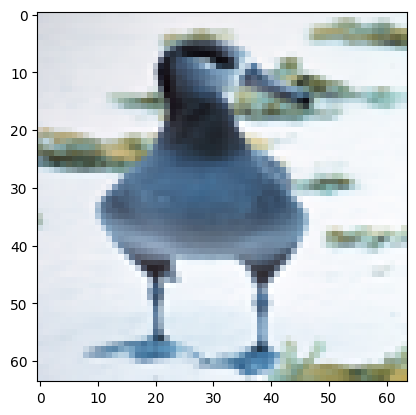

In [ ]:
plt.imshow(images_arr[30])

# Generate Text Embeddings 

In [ ]:
pip install nepali-embedding

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 67.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 67.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 79.5 MB/s eta 0:00:00
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895259 sha256=a83cbf63af3bbb42f2ec14786a9df19d275c7fbe15decffababfa8c3a5038c80
  Stored in directory: /root/.cache/pip/wheels/12/1c/3d/46cf06718d63a32ff798a89594b61e7f345ab6b36d909ce033
Successfully built sacremoses
 

In [ ]:
with open(TEXT_DIR, 'r', encoding = 'utf-8') as f:
  cap = f.readlines()

In [ ]:
cap = cap[:5005]

In [ ]:
from nepali_embedding.nepBERT.embedding_generator import NepBERT
nepbert = NepBERT()

Downloading:   0%|          | 0.00/589 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/516k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/418M [00:00<?, ?B/s]

In [ ]:
index_to_remove = [436, 1355, 3624, 3644, 3775]

In [ ]:
#np_arr.shape

In [ ]:
text_embeddings = []
for lines in cap:
  embedding = nepbert.get_bert_embedding_sentence(lines,)
  embedding = embedding.detach().cpu().numpy()
  text_embeddings.append(embedding)

Streaming output truncated to the last 5000 lines.
7 बिल
8 लामो
9 र
10 खरो
11 छ
12 ,
13 र
14 पट
15 सत
16 ##ो
17 छ
18 ।
19 [SEP]
0 [CLS]
1 यो
2 चराको
3 लामो
4 रड
5 बिल
6 र
7 खरो
8 शरीर
9 निलो
10 ##सग
11 निलो
12 ##सग
13 छ
14 ।
15 [SEP]
0 [CLS]
1 लामो
2 च
3 ##च
4 ##चो
5 र
6 नीलो
7 पख
8 ##टाको
9 साथ
10 लामो
11 च
12 ##च
13 ##चो
14 र
15 नीलो
16 पख
17 ##टा
18 प
19 ##वा
20 ##ख
21 ##हरको
22 साथ
23 सानो
24 चरा
25 [SEP]
0 [CLS]
1 लामो
2 सन
3 ##तला
4 ##को
5 च
6 ##च
7 ##चो
8 खल
9 ,
10 यो
11 चराको
12 सन
13 ##दर
14 सत
15 ##ो
16 सत
17 ##न
18 र
19 भव
20 ##य
21 निलो
22 फिर
23 ##ता
24 छ
25 ।
26 [SEP]
0 [CLS]
1 एक
2 सानो
3 चरा
4 एक
5 चमक
6 ##िलो
7 सत
8 ##ो
9 पट
10 सग
11 लामो
12 र
13 सन
14 ##तला
15 बक
16 छ
17 ,
18 र
19 यो
20 फिर
21 ##ता
22 उज
23 ##ज
24 ##वल
25 सट
26 ##िट
27 ##ोलि
28 ##ज
29 छ
30 ।
31 [SEP]
0 [CLS]
1 यो
2 सत
3 ##ो
4 सत
5 ##न
6 र
7 निलो
8 पख
9 ##टाको
10 साथ
11 र
12 ##गी
13 ##न
14 चरा
15 हो
16 ।
17 [SEP]
0 [CLS]
1 एक
2 ठ
3 ##लो
4 ,
5 रातो
6 बिल
7 को
8 साथ
9 चरा
10 जन
11 सन
12 ##तला
13 बिन
14 #

In [ ]:
len(text_embeddings)

5005

In [ ]:
index_to_remove

[436, 1355, 3624, 3644, 3775]

In [ ]:
for index in index_to_remove:
    del text_embeddings[index]

In [ ]:
text_embeds = np.asarray(text_embeddings)

In [ ]:
text_embeds.shape

(5000, 768)

In [ ]:
# save the numpy array in a pickle file
with open(f"{ROOT_DIR}/data/dataset/embeddings.pickle", 'wb') as f:
  pickle.dump(text_embeds, f)

In [ ]:
text_e = pd.read_pickle(f"{ROOT_DIR}/data/dataset/embeddings.pickle")

In [ ]:
len(text_e)

5000

# Load Dataset

In [ ]:
images = pd.read_pickle(f"{ROOT_DIR}/data/dataset/normalized_images.pickle")
text_embeds = pd.read_pickle(f"{ROOT_DIR}/data/dataset/embeddings.pickle")

In [ ]:
len(images), len(text_embeds)

(5000, 5000)

In [ ]:
print(f"The shape of image is {images[0].shape}")
print(f"The shape of text embeddings is {text_embeds[0].shape}")

The shape of image is (64, 64, 3)
The shape of text embeddings is (768,)


In [ ]:
print(f"The type of image is {type(images)}")
print(f"The type of text embeddings is {type(text_embeds)}")

The type of image is <class 'numpy.ndarray'>
The type of text embeddings is <class 'numpy.ndarray'>


# GAN architecture

In [ ]:
GENERATE_RES = 2 # Generation resolution factor 
# (1=32, 2=64, 3=96, 4=128, etc.)
GENERATE_SQUARE = 32 * GENERATE_RES # rows/cols (should be square)
IMAGE_CHANNELS = 3

# Preview image 
PREVIEW_ROWS = 4
PREVIEW_COLS = 7
PREVIEW_MARGIN = 16

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Reshape, Dropout, Dense, Concatenate 
from tensorflow.keras.layers import Flatten, BatchNormalization
from tensorflow.keras.layers import Activation, ZeroPadding2D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import UpSampling2D, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras import initializers
from sklearn.metrics import mean_squared_error

In [ ]:
def build_generator(seed_size,embedding_size, channels):
  input_seed = Input(shape=seed_size)
  input_embed = Input(shape = embedding_size)
  d0 = Dense(128)(input_embed)
  leaky0 = LeakyReLU(alpha=0.2)(d0)

  merge = Concatenate()([input_seed, leaky0])

  d1 = Dense(4*4*256,activation="relu")(merge)
  reshape = Reshape((4,4,256))(d1)

  upSamp1 = UpSampling2D()(reshape)
  conv2d1 = Conv2DTranspose(256,kernel_size=5,padding="same",kernel_initializer=initializers.RandomNormal(stddev=0.02))(upSamp1)
  batchNorm1 = BatchNormalization(momentum=0.8)(conv2d1)
  leaky1 = LeakyReLU(alpha=0.2)(batchNorm1)

  upSamp2 = UpSampling2D()(leaky1)
  conv2d2 = Conv2DTranspose(256,kernel_size=5,padding="same",kernel_initializer=initializers.RandomNormal(stddev=0.02))(upSamp2)
  batchNorm2 = BatchNormalization(momentum=0.8)(conv2d2)
  leaky2 = LeakyReLU(alpha=0.2)(batchNorm2)

  upSamp3 = UpSampling2D()(leaky2)
  conv2d3 = Conv2DTranspose(128,kernel_size=4,padding="same",kernel_initializer=initializers.RandomNormal(stddev=0.02))(upSamp3)
  batchNorm3 = BatchNormalization(momentum=0.8)(conv2d3)
  leaky3 = LeakyReLU(alpha=0.2)(batchNorm3)

  upSamp4 = UpSampling2D(size=(GENERATE_RES,GENERATE_RES))(leaky3)
  conv2d4 = Conv2DTranspose(128,kernel_size=4,padding="same",kernel_initializer=initializers.RandomNormal(stddev=0.02))(upSamp4)
  batchNorm4 = BatchNormalization(momentum=0.8)(conv2d4)
  leaky4 = LeakyReLU(alpha=0.2)(batchNorm4)

  outputConv = Conv2DTranspose(channels,kernel_size=3,padding="same",kernel_initializer=initializers.RandomNormal(stddev=0.02))(leaky4)
  outputActi = Activation("tanh")(outputConv)

  model = Model(inputs=[input_seed,input_embed], outputs=outputActi)
  return model

In [ ]:
generator = build_generator(seed_size=100,embedding_size=768, channels=3)
generator.load_weights(f"{ROOT_DIR}/models/gen.h5")
generator.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 768)]        0           []                               
                                                                                                  
 dense_2 (Dense)                (None, 128)          98432       ['input_4[0][0]']                
                                                                                                  
 input_3 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 leaky_re_lu_5 (LeakyReLU)      (None, 128)          0           ['dense_2[0][0]']                
                                                                                            

In [ ]:
def build_discriminator(image_shape, embedding_size):
  input_shape = Input(shape=image_shape)
  input_embed = Input(shape=embedding_size)

  conv2d1 = Conv2D(32,kernel_size=4,strides=2,input_shape=image_shape,padding="same",kernel_initializer=initializers.RandomNormal(stddev=0.02))(input_shape)
  leaky1 = LeakyReLU(alpha=0.2)(conv2d1)

  drop2 = Dropout(0.25)(leaky1)
  conv2d2 = Conv2D(64, kernel_size=4, strides=2, padding="same",kernel_initializer=initializers.RandomNormal(stddev=0.02))(drop2)
  # zero2 = ZeroPadding2D(padding=((0,1),(0,1)))(conv2d2)
  batchNorm2 = BatchNormalization(momentum=0.8)(conv2d2)
  leaky2 = LeakyReLU(alpha=0.2)(batchNorm2)

  drop3 = Dropout(0.25)(leaky2)
  conv2d3 = Conv2D(128, kernel_size=4, strides=2, padding="same",kernel_initializer=initializers.RandomNormal(stddev=0.02))(drop3)
  batchNorm3 = BatchNormalization(momentum=0.8)(conv2d3)
  leaky3 = LeakyReLU(alpha=0.2)(batchNorm3)

  drop4 = Dropout(0.25)(leaky3)
  conv2d4 = Conv2D(256, kernel_size=4, strides=2, padding="same",kernel_initializer=initializers.RandomNormal(stddev=0.02))(drop4)
  batchNorm4 = BatchNormalization(momentum=0.8)(conv2d4)
  leaky4 = LeakyReLU(alpha=0.2)(batchNorm4)

  dense_embed = Dense(128,kernel_initializer=initializers.RandomNormal(stddev=0.02))(input_embed)
  leaky_embed = LeakyReLU(alpha=0.2)(dense_embed)
  reshape_embed = Reshape((4,4,8))(leaky_embed)
  merge_embed = Concatenate()([leaky4, reshape_embed])

  drop5 = Dropout(0.25)(merge_embed)
  conv2d5 = Conv2D(512, kernel_size=4,kernel_initializer=initializers.RandomNormal(stddev=0.02))(drop5)
  batchNorm5 = BatchNormalization(momentum=0.8)(conv2d5)
  leaky5 = LeakyReLU(alpha=0.2)(batchNorm5)

  drop6 = Dropout(0.25)(leaky5)
  flatten = Flatten()(drop6)
  output = Dense(1,activation="sigmoid")(flatten)

  model = Model(inputs=[input_shape,input_embed], outputs=output)
  return model

In [ ]:
discriminator = build_discriminator((64,64,3), 768)
discriminator.load_weights(f"{ROOT_DIR}/models/disc.h5")
discriminator.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 32)   1568        ['input_5[0][0]']                
                                                                                                  
 leaky_re_lu_10 (LeakyReLU)     (None, 32, 32, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 dropout (Dropout)              (None, 32, 32, 32)   0           ['leaky_re_lu_10[0][0]']         
                                                                                            

In [ ]:
def save_images(cnt,noise,embeds):
  image_array = np.full(( 
      PREVIEW_MARGIN + (PREVIEW_ROWS * (GENERATE_SQUARE+PREVIEW_MARGIN)), 
      PREVIEW_MARGIN + (PREVIEW_COLS * (GENERATE_SQUARE+PREVIEW_MARGIN)), 3), 
      255, dtype=np.uint8)

  generated_images = generator.predict((noise,embeds))

  generated_images = 0.5 * generated_images + 0.5
  image_count = 0
  for row in range(PREVIEW_ROWS):
      for col in range(PREVIEW_COLS):
        r = row * (GENERATE_SQUARE+16) + PREVIEW_MARGIN
        c = col * (GENERATE_SQUARE+16) + PREVIEW_MARGIN
        image_array[r:r+GENERATE_SQUARE,c:c+GENERATE_SQUARE] \
            = generated_images[image_count] * 255
        image_count += 1
          
  output_path = f"{ROOT_DIR}/generated_images"
  if not os.path.exists(output_path):
    os.makedirs(output_path)

  filename = os.path.join(output_path,f"train-{382+cnt}.png")
  im = Image.fromarray(image_array)
  im.save(filename)

In [ ]:
# Sample output from the Generator
noise = tf.random.normal([1, 100])
generated_image = generator((noise,text_embeds[1].reshape(1,768)), training=False)

plt.imshow(generated_image[0, :, :, 0])

NameError: ignored

In [ ]:
decision = discriminator((generated_image,text_embeds[5].reshape(1,768)))
print(decision)

tf.Tensor([[0.4911868]], shape=(1, 1), dtype=float32)


In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=2.0e-4,beta_1 = 0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=2.0e-4,beta_1 = 0.5)

# Some error solving

In [ ]:
# # save the numpy array in a pickle file
# with open(f"{ROOT_DIR}/data/dataset/embeddings.pickle", 'wb') as f:
#   pickle.dump(embeds, f)

# # save the numpy array in a pickle file
# with open(f"{ROOT_DIR}/data/dataset/normalized_images.pickle", 'wb') as f:
#   pickle.dump(final_image, f)

In [ ]:
embeds = pd.read_pickle(f"{ROOT_DIR}/data/dataset/embeddings.pickle")
final_image = pd.read_pickle(f"{ROOT_DIR}/data/dataset/normalized_images.pickle")

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices({'images': final_image,
                                                    'embeddings': embeds}).shuffle(1000).batch(32)

# TRAINING

In [ ]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy()

def discriminator_loss(real_image_real_text, fake_image_real_text, real_image_fake_text):
    real_loss = cross_entropy(tf.random.uniform(real_image_real_text.shape,0.8,1.0), real_image_real_text)
    fake_loss = (cross_entropy(tf.random.uniform(fake_image_real_text.shape,0.0,0.2), fake_image_real_text) + 
                 cross_entropy(tf.random.uniform(real_image_fake_text.shape,0.0,0.2), real_image_fake_text))/2

    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=2.0e-4,beta_1 = 0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=2.0e-4,beta_1 = 0.5)

In [ ]:
BATCH_SIZE = 32
SEED_SIZE = 100
save_images_embeddings = np.copy(embeds[:28])

In [ ]:
def train_step(final_image, embeds, fake_captions):
  seed = tf.random.normal([BATCH_SIZE, SEED_SIZE], dtype=tf.float32)

  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    generated_images = generator((seed, embeds), training=True)
    real_image_real_text = discriminator((final_image,embeds), training=True)
    real_image_fake_text = discriminator((final_image,fake_captions), training=True)
    fake_image_real_text = discriminator((generated_images,embeds), training=True)

    gen_loss = generator_loss(fake_image_real_text)
    disc_loss = discriminator_loss(real_image_real_text, fake_image_real_text, real_image_fake_text)
    # print(gen_loss)
    # print(disc_loss)

    gradients_of_generator = gen_tape.gradient(\
        gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(\
        disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(
        gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(
        gradients_of_discriminator, 
        discriminator.trainable_variables))
  return gen_loss,disc_loss

In [ ]:
# Function that executes trianing process
def train(train_dataset, epochs):
  fixed_seed = np.random.normal(0, 1, (PREVIEW_ROWS * PREVIEW_COLS, 
                                       SEED_SIZE))
  fixed_embed = save_images_embeddings

  start = time.time()

  for epoch in range(epochs):
    print("epoch start...")
    epoch_start = time.time()

    gen_loss_list = []
    disc_loss_list = []

    for batch in train_dataset[:-1]:
      # train_batch = training_data[BATCH_SIZE*image_batch : BATCH_SIZE*image_batch + BATCH_SIZE]
      # caption_batch = captions[BATCH_SIZE*image_batch : BATCH_SIZE*image_batch + BATCH_SIZE]
      train_batch = batch['images']
      caption_batch = batch['embeddings']
      
      fake_caption_batch = np.copy(caption_batch)
      np.random.shuffle(fake_caption_batch)
      
      t = train_step(train_batch,caption_batch,fake_caption_batch)

      gen_loss_list.append(t[0])
      disc_loss_list.append(t[1])

    g_loss = sum(gen_loss_list) / len(gen_loss_list)
    d_loss = sum(disc_loss_list) / len(disc_loss_list)

    epoch_elapsed = time.time()-epoch_start
    print(f'Epoch {epoch+1}, gen loss={g_loss},disc loss={d_loss}, {hms_string(epoch_elapsed)}')
    save_images(epoch,fixed_seed,fixed_embed)
    
    generator.save(f"{ROOT_DIR}/models/gen.h5")
    discriminator.save(os.path.join(f"{ROOT_DIR}/models/disc.h5"))
    print("model saved")

  elapsed = time.time()-start
  print ('Training time:', hms_string(elapsed))

In [ ]:
train(list(train_dataset.as_numpy_iterator()), 200)

epoch start...


Epoch 1, gen loss=1.2437589168548584,disc loss=1.2381280660629272, 0:01:03.91
1/1 [==============================] - 1s 976ms/step


model saved
epoch start...
Epoch 2, gen loss=1.0783417224884033,disc loss=1.2501174211502075, 0:00:44.37
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 3, gen loss=1.0856585502624512,disc loss=1.2518669366836548, 0:00:43.53
1/1 [==============================] - 0s 22ms/step


model saved
epoch start...
Epoch 4, gen loss=1.2027369737625122,disc loss=1.232501745223999, 0:00:43.97
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 5, gen loss=1.3081413507461548,disc loss=1.195859432220459, 0:00:44.96
1/1 [==============================] - 0s 21ms/step


model saved
epoch start...
Epoch 6, gen loss=1.245465636253357,disc loss=1.210747241973877, 0:00:44.81
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 7, gen loss=1.136236310005188,disc loss=1.2286295890808105, 0:00:44.40
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 8, gen loss=1.1882233619689941,disc loss=1.2140620946884155, 0:00:44.56
1/1 [==============================] - 0s 35ms/step


model saved
epoch start...
Epoch 9, gen loss=1.2631052732467651,disc loss=1.1991058588027954, 0:00:44.58
1/1 [==============================] - 0s 21ms/step


model saved
epoch start...
Epoch 10, gen loss=1.14486825466156,disc loss=1.2255088090896606, 0:00:44.56
1/1 [==============================] - 0s 21ms/step


model saved
epoch start...
Epoch 11, gen loss=1.1330742835998535,disc loss=1.2169780731201172, 0:00:45.38
1/1 [==============================] - 0s 22ms/step


model saved
epoch start...
Epoch 12, gen loss=1.0947046279907227,disc loss=1.2269951105117798, 0:00:44.51
1/1 [==============================] - 0s 21ms/step


model saved
epoch start...
Epoch 13, gen loss=1.0981733798980713,disc loss=1.2304186820983887, 0:00:44.75
1/1 [==============================] - 0s 21ms/step


model saved
epoch start...
Epoch 14, gen loss=1.1432552337646484,disc loss=1.2118295431137085, 0:00:44.32
1/1 [==============================] - 0s 21ms/step


model saved
epoch start...
Epoch 15, gen loss=1.1594499349594116,disc loss=1.221278429031372, 0:00:44.51
1/1 [==============================] - 0s 39ms/step


model saved
epoch start...
Epoch 16, gen loss=1.2122386693954468,disc loss=1.1989694833755493, 0:00:44.28
1/1 [==============================] - 0s 21ms/step


model saved
epoch start...
Epoch 17, gen loss=1.145015835762024,disc loss=1.2122663259506226, 0:00:44.34
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 18, gen loss=1.1494574546813965,disc loss=1.2045470476150513, 0:00:44.31
1/1 [==============================] - 0s 24ms/step


model saved
epoch start...
Epoch 19, gen loss=1.1111387014389038,disc loss=1.225129246711731, 0:00:44.07
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 20, gen loss=1.1795496940612793,disc loss=1.1993318796157837, 0:00:43.21
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 21, gen loss=1.1675360202789307,disc loss=1.2063238620758057, 0:00:43.82
1/1 [==============================] - 0s 22ms/step


model saved
epoch start...
Epoch 22, gen loss=1.1399914026260376,disc loss=1.2050753831863403, 0:00:43.75
1/1 [==============================] - 0s 29ms/step


model saved
epoch start...
Epoch 23, gen loss=1.4031193256378174,disc loss=1.1611509323120117, 0:00:43.70
1/1 [==============================] - 0s 21ms/step


model saved
epoch start...
Epoch 24, gen loss=1.224353313446045,disc loss=1.180538296699524, 0:00:44.11
1/1 [==============================] - 0s 34ms/step


model saved
epoch start...
Epoch 25, gen loss=1.1604158878326416,disc loss=1.2063536643981934, 0:00:43.75
1/1 [==============================] - 0s 22ms/step


model saved
epoch start...
Epoch 26, gen loss=1.1521810293197632,disc loss=1.1930315494537354, 0:00:44.73
1/1 [==============================] - 0s 22ms/step


model saved
epoch start...
Epoch 27, gen loss=1.2720692157745361,disc loss=1.1844019889831543, 0:00:44.53
1/1 [==============================] - 0s 22ms/step


model saved
epoch start...
Epoch 28, gen loss=1.2029547691345215,disc loss=1.1929206848144531, 0:00:43.59
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 29, gen loss=1.1621662378311157,disc loss=1.1968762874603271, 0:00:43.66
1/1 [==============================] - 0s 31ms/step


model saved
epoch start...
Epoch 30, gen loss=1.1081295013427734,disc loss=1.2152162790298462, 0:00:43.23
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 31, gen loss=1.1940836906433105,disc loss=1.1906079053878784, 0:00:44.07
1/1 [==============================] - 0s 34ms/step


model saved
epoch start...
Epoch 32, gen loss=1.2229130268096924,disc loss=1.1803057193756104, 0:00:43.37
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 33, gen loss=1.1094847917556763,disc loss=1.1985459327697754, 0:00:43.94
1/1 [==============================] - 0s 21ms/step


model saved
epoch start...
Epoch 34, gen loss=1.2079797983169556,disc loss=1.1832894086837769, 0:00:43.29
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 35, gen loss=1.3361051082611084,disc loss=1.1586405038833618, 0:00:43.65
1/1 [==============================] - 0s 21ms/step


model saved
epoch start...
Epoch 36, gen loss=1.192974328994751,disc loss=1.1832207441329956, 0:00:43.31
1/1 [==============================] - 0s 21ms/step


model saved
epoch start...
Epoch 37, gen loss=1.17864990234375,disc loss=1.184726595878601, 0:00:43.45
1/1 [==============================] - 0s 22ms/step


model saved
epoch start...
Epoch 38, gen loss=1.1840533018112183,disc loss=1.1800020933151245, 0:00:43.96
1/1 [==============================] - 0s 31ms/step


model saved
epoch start...
Epoch 39, gen loss=1.250064730644226,disc loss=1.1690324544906616, 0:00:43.40
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 40, gen loss=1.297921061515808,disc loss=1.167314052581787, 0:00:43.80
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 41, gen loss=1.252803087234497,disc loss=1.1668586730957031, 0:00:43.56
1/1 [==============================] - 0s 21ms/step


model saved
epoch start...
Epoch 42, gen loss=1.2423079013824463,disc loss=1.172125220298767, 0:00:43.91
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 43, gen loss=1.1288294792175293,disc loss=1.1883554458618164, 0:00:43.94
1/1 [==============================] - 0s 43ms/step


model saved
epoch start...
Epoch 44, gen loss=1.1748619079589844,disc loss=1.179392695426941, 0:00:44.11
1/1 [==============================] - 0s 42ms/step


model saved
epoch start...
Epoch 45, gen loss=1.2156685590744019,disc loss=1.1712669134140015, 0:00:43.80
1/1 [==============================] - 0s 21ms/step


model saved
epoch start...
Epoch 46, gen loss=1.424172282218933,disc loss=1.1435235738754272, 0:00:43.36
1/1 [==============================] - 0s 22ms/step


model saved
epoch start...
Epoch 47, gen loss=1.2750824689865112,disc loss=1.166953206062317, 0:00:43.46
1/1 [==============================] - 0s 22ms/step


model saved
epoch start...
Epoch 48, gen loss=1.2572154998779297,disc loss=1.1594595909118652, 0:00:43.15
1/1 [==============================] - 0s 21ms/step


model saved
epoch start...
Epoch 49, gen loss=1.2742159366607666,disc loss=1.1418166160583496, 0:00:43.47
1/1 [==============================] - 0s 22ms/step


model saved
epoch start...
Epoch 50, gen loss=1.241426706314087,disc loss=1.1723763942718506, 0:00:43.29
1/1 [==============================] - 0s 31ms/step


model saved
epoch start...
Epoch 51, gen loss=1.2062559127807617,disc loss=1.1648006439208984, 0:00:43.70
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 52, gen loss=1.1975144147872925,disc loss=1.1725841760635376, 0:00:43.90
1/1 [==============================] - 0s 31ms/step


model saved
epoch start...
Epoch 53, gen loss=1.1808446645736694,disc loss=1.1836092472076416, 0:00:43.14
1/1 [==============================] - 0s 21ms/step


model saved
epoch start...
Epoch 54, gen loss=1.1756621599197388,disc loss=1.1744517087936401, 0:00:43.30
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 55, gen loss=1.162416934967041,disc loss=1.1760191917419434, 0:00:42.85
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 56, gen loss=1.1679517030715942,disc loss=1.172452688217163, 0:00:43.28
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 57, gen loss=1.2085936069488525,disc loss=1.1696627140045166, 0:00:42.96
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 58, gen loss=1.2692632675170898,disc loss=1.1381853818893433, 0:00:43.90
1/1 [==============================] - 0s 19ms/step


model saved
epoch start...
Epoch 59, gen loss=1.226062536239624,disc loss=1.1623690128326416, 0:00:43.02
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 60, gen loss=1.2268693447113037,disc loss=1.1586602926254272, 0:00:43.35
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 61, gen loss=1.246561884880066,disc loss=1.1543854475021362, 0:00:43.21
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 62, gen loss=1.1473886966705322,disc loss=1.1701276302337646, 0:00:43.23
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 63, gen loss=1.1503325700759888,disc loss=1.1729472875595093, 0:00:43.44
1/1 [==============================] - 0s 38ms/step


model saved
epoch start...
Epoch 64, gen loss=1.2016370296478271,disc loss=1.1528395414352417, 0:00:43.16
1/1 [==============================] - 0s 21ms/step


model saved
epoch start...
Epoch 65, gen loss=1.140997290611267,disc loss=1.1698664426803589, 0:00:44.24
1/1 [==============================] - 0s 23ms/step


model saved
epoch start...
Epoch 66, gen loss=1.1175060272216797,disc loss=1.1764956712722778, 0:00:43.06
1/1 [==============================] - 0s 21ms/step


model saved
epoch start...
Epoch 67, gen loss=1.1737602949142456,disc loss=1.1726454496383667, 0:00:43.58
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 68, gen loss=1.2268929481506348,disc loss=1.153138279914856, 0:00:43.03
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 69, gen loss=1.2200974225997925,disc loss=1.155164122581482, 0:00:43.37
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 70, gen loss=1.280579924583435,disc loss=1.1454414129257202, 0:00:43.21
1/1 [==============================] - 0s 30ms/step


model saved
epoch start...
Epoch 71, gen loss=1.1936638355255127,disc loss=1.1541776657104492, 0:00:43.13
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 72, gen loss=1.4612860679626465,disc loss=1.1240150928497314, 0:00:43.81
1/1 [==============================] - 0s 21ms/step


model saved
epoch start...
Epoch 73, gen loss=1.4508191347122192,disc loss=1.114459753036499, 0:00:43.04
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 74, gen loss=1.34328031539917,disc loss=1.1332943439483643, 0:00:43.47
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 75, gen loss=1.2902406454086304,disc loss=1.1367415189743042, 0:00:43.12
1/1 [==============================] - 0s 25ms/step


model saved
epoch start...
Epoch 76, gen loss=1.2816659212112427,disc loss=1.140647053718567, 0:00:43.62
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 77, gen loss=1.3194783926010132,disc loss=1.129320740699768, 0:00:43.30
1/1 [==============================] - 0s 32ms/step


model saved
epoch start...
Epoch 78, gen loss=1.2947019338607788,disc loss=1.1201045513153076, 0:00:42.98
1/1 [==============================] - 0s 21ms/step


model saved
epoch start...
Epoch 79, gen loss=1.3356767892837524,disc loss=1.1271475553512573, 0:00:43.70
1/1 [==============================] - 0s 23ms/step


model saved
epoch start...
Epoch 80, gen loss=1.345683217048645,disc loss=1.1250205039978027, 0:00:43.05
1/1 [==============================] - 0s 23ms/step


model saved
epoch start...
Epoch 81, gen loss=1.2567037343978882,disc loss=1.1478521823883057, 0:00:43.21
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 82, gen loss=1.272995948791504,disc loss=1.1272356510162354, 0:00:42.94
1/1 [==============================] - 0s 22ms/step


model saved
epoch start...
Epoch 83, gen loss=1.5714777708053589,disc loss=1.1055991649627686, 0:00:43.34
1/1 [==============================] - 0s 22ms/step


model saved
epoch start...
Epoch 84, gen loss=1.5285664796829224,disc loss=1.0999882221221924, 0:00:42.89
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 85, gen loss=1.3917194604873657,disc loss=1.1097396612167358, 0:00:43.21
1/1 [==============================] - 0s 21ms/step


model saved
epoch start...
Epoch 86, gen loss=1.3132871389389038,disc loss=1.130834937095642, 0:00:43.11
1/1 [==============================] - 0s 21ms/step


model saved
epoch start...
Epoch 87, gen loss=1.295827865600586,disc loss=1.1207880973815918, 0:00:43.49
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 88, gen loss=1.3117258548736572,disc loss=1.12412428855896, 0:00:43.12
1/1 [==============================] - 0s 35ms/step


model saved
epoch start...
Epoch 89, gen loss=1.2430903911590576,disc loss=1.1391555070877075, 0:00:42.95
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 90, gen loss=1.3265823125839233,disc loss=1.1340667009353638, 0:00:43.31
1/1 [==============================] - 0s 21ms/step


model saved
epoch start...
Epoch 91, gen loss=1.3645867109298706,disc loss=1.1076114177703857, 0:00:42.87
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 92, gen loss=1.3341492414474487,disc loss=1.1113204956054688, 0:00:43.29
1/1 [==============================] - 0s 21ms/step


model saved
epoch start...
Epoch 93, gen loss=1.351012945175171,disc loss=1.1120213270187378, 0:00:42.84
1/1 [==============================] - 0s 21ms/step


model saved
epoch start...
Epoch 94, gen loss=1.3356893062591553,disc loss=1.1260961294174194, 0:00:43.54
1/1 [==============================] - 0s 21ms/step


model saved
epoch start...
Epoch 95, gen loss=1.331470012664795,disc loss=1.108441710472107, 0:00:43.10
1/1 [==============================] - 0s 19ms/step


model saved
epoch start...
Epoch 96, gen loss=1.6401445865631104,disc loss=1.0901061296463013, 0:00:43.14
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 97, gen loss=1.5072025060653687,disc loss=1.0925477743148804, 0:00:43.01
1/1 [==============================] - 0s 32ms/step


model saved
epoch start...
Epoch 98, gen loss=1.4021782875061035,disc loss=1.0927045345306396, 0:00:42.92
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 99, gen loss=1.3072398900985718,disc loss=1.1212505102157593, 0:00:43.00
1/1 [==============================] - 0s 31ms/step


model saved
epoch start...
Epoch 100, gen loss=1.331878900527954,disc loss=1.105916976928711, 0:00:42.77
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 101, gen loss=1.2436518669128418,disc loss=1.1368221044540405, 0:00:43.57
1/1 [==============================] - 0s 35ms/step


model saved
epoch start...
Epoch 102, gen loss=1.430434226989746,disc loss=1.111429214477539, 0:00:42.83
1/1 [==============================] - 0s 19ms/step


model saved
epoch start...
Epoch 103, gen loss=1.292887806892395,disc loss=1.1195530891418457, 0:00:43.07
1/1 [==============================] - 0s 21ms/step


model saved
epoch start...
Epoch 104, gen loss=1.3368605375289917,disc loss=1.1156864166259766, 0:00:42.68
1/1 [==============================] - 0s 23ms/step


model saved
epoch start...
Epoch 105, gen loss=1.3554446697235107,disc loss=1.1071274280548096, 0:00:43.18
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 106, gen loss=1.3668212890625,disc loss=1.1051265001296997, 0:00:42.77
1/1 [==============================] - 0s 22ms/step


model saved
epoch start...
Epoch 107, gen loss=1.44083833694458,disc loss=1.0985366106033325, 0:00:43.17
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 108, gen loss=1.3238838911056519,disc loss=1.1078094244003296, 0:00:42.98
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 109, gen loss=1.3897497653961182,disc loss=1.0931159257888794, 0:00:43.12
1/1 [==============================] - 0s 21ms/step


model saved
epoch start...
Epoch 110, gen loss=1.3155382871627808,disc loss=1.1201345920562744, 0:00:42.66
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 111, gen loss=1.344101071357727,disc loss=1.1071363687515259, 0:00:43.11
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 112, gen loss=1.4475785493850708,disc loss=1.0961984395980835, 0:00:42.94
1/1 [==============================] - 0s 22ms/step


model saved
epoch start...
Epoch 113, gen loss=1.3305621147155762,disc loss=1.112610101699829, 0:00:43.08
1/1 [==============================] - 0s 21ms/step


model saved
epoch start...
Epoch 114, gen loss=1.3392211198806763,disc loss=1.1042505502700806, 0:00:42.91
1/1 [==============================] - 0s 28ms/step


model saved
epoch start...
Epoch 115, gen loss=1.3193131685256958,disc loss=1.1070289611816406, 0:00:43.52
1/1 [==============================] - 0s 38ms/step


model saved
epoch start...
Epoch 116, gen loss=1.3492531776428223,disc loss=1.1009074449539185, 0:00:43.15
1/1 [==============================] - 0s 43ms/step


model saved
epoch start...
Epoch 117, gen loss=1.3377102613449097,disc loss=1.1071500778198242, 0:00:42.93
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 118, gen loss=1.3301303386688232,disc loss=1.1014238595962524, 0:00:43.49
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 119, gen loss=1.5197854042053223,disc loss=1.0847439765930176, 0:00:42.79
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 120, gen loss=1.385226845741272,disc loss=1.097167730331421, 0:00:43.18
1/1 [==============================] - 0s 19ms/step


model saved
epoch start...
Epoch 121, gen loss=1.398932933807373,disc loss=1.1040557622909546, 0:00:42.91
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 122, gen loss=1.3931103944778442,disc loss=1.0899587869644165, 0:00:43.55
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 123, gen loss=1.2885245084762573,disc loss=1.1163965463638306, 0:00:43.69
1/1 [==============================] - 0s 29ms/step


model saved
epoch start...
Epoch 124, gen loss=1.3040755987167358,disc loss=1.1074658632278442, 0:00:43.00
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 125, gen loss=1.2907006740570068,disc loss=1.1166431903839111, 0:00:44.30
1/1 [==============================] - 0s 22ms/step


model saved
epoch start...
Epoch 126, gen loss=1.318677544593811,disc loss=1.100577712059021, 0:00:42.97
1/1 [==============================] - 0s 22ms/step


model saved
epoch start...
Epoch 127, gen loss=1.2896734476089478,disc loss=1.1136019229888916, 0:00:43.20
1/1 [==============================] - 0s 24ms/step


model saved
epoch start...
Epoch 128, gen loss=1.3788659572601318,disc loss=1.1000229120254517, 0:00:43.26
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 129, gen loss=1.4507883787155151,disc loss=1.085749626159668, 0:00:43.75
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 130, gen loss=1.3472946882247925,disc loss=1.0992804765701294, 0:00:43.22
1/1 [==============================] - 0s 21ms/step


model saved
epoch start...
Epoch 131, gen loss=1.3773783445358276,disc loss=1.099843144416809, 0:00:43.37
1/1 [==============================] - 0s 19ms/step


model saved
epoch start...
Epoch 132, gen loss=1.489737868309021,disc loss=1.0890916585922241, 0:00:43.44
1/1 [==============================] - 0s 31ms/step


model saved
epoch start...
Epoch 133, gen loss=1.4082752466201782,disc loss=1.084969162940979, 0:00:43.29
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 134, gen loss=1.6387584209442139,disc loss=1.055985689163208, 0:00:43.61
1/1 [==============================] - 0s 37ms/step


model saved
epoch start...
Epoch 135, gen loss=1.3936667442321777,disc loss=1.077146053314209, 0:00:43.14
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 136, gen loss=1.3667268753051758,disc loss=1.0930835008621216, 0:00:43.55
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 137, gen loss=1.4028773307800293,disc loss=1.081120491027832, 0:00:43.77
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 138, gen loss=1.58297598361969,disc loss=1.0564384460449219, 0:00:43.67
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 139, gen loss=1.4151668548583984,disc loss=1.077181100845337, 0:00:43.58
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 140, gen loss=1.3794723749160767,disc loss=1.0823768377304077, 0:00:43.56
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 141, gen loss=1.3881100416183472,disc loss=1.0797559022903442, 0:00:43.38
1/1 [==============================] - 0s 29ms/step


model saved
epoch start...
Epoch 142, gen loss=1.5606220960617065,disc loss=1.0686222314834595, 0:00:43.33
1/1 [==============================] - 0s 21ms/step


model saved
epoch start...
Epoch 143, gen loss=1.5593657493591309,disc loss=1.0543901920318604, 0:00:43.48
1/1 [==============================] - 0s 31ms/step


model saved
epoch start...
Epoch 144, gen loss=1.3999887704849243,disc loss=1.078238844871521, 0:00:43.18
1/1 [==============================] - 0s 29ms/step


model saved
epoch start...
Epoch 145, gen loss=1.3020951747894287,disc loss=1.0981833934783936, 0:00:43.54
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 146, gen loss=1.355852723121643,disc loss=1.0934969186782837, 0:00:42.90
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 147, gen loss=1.3979061841964722,disc loss=1.0783004760742188, 0:00:43.41
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 148, gen loss=1.52162504196167,disc loss=1.0750489234924316, 0:00:42.95
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 149, gen loss=1.4534265995025635,disc loss=1.060712218284607, 0:00:43.29
1/1 [==============================] - 0s 21ms/step


model saved
epoch start...
Epoch 150, gen loss=1.4186269044876099,disc loss=1.0781137943267822, 0:00:43.28
1/1 [==============================] - 0s 37ms/step


model saved
epoch start...
Epoch 151, gen loss=1.402271032333374,disc loss=1.0814540386199951, 0:00:43.17
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 152, gen loss=1.4821453094482422,disc loss=1.0741668939590454, 0:00:43.74
1/1 [==============================] - 0s 32ms/step


model saved
epoch start...
Epoch 153, gen loss=1.5450435876846313,disc loss=1.065301537513733, 0:00:43.01
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 154, gen loss=1.4366114139556885,disc loss=1.0677872896194458, 0:00:43.49
1/1 [==============================] - 0s 21ms/step


model saved
epoch start...
Epoch 155, gen loss=1.3767544031143188,disc loss=1.0799334049224854, 0:00:43.07
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 156, gen loss=1.392348051071167,disc loss=1.0843631029129028, 0:00:43.43
1/1 [==============================] - 0s 26ms/step


model saved
epoch start...
Epoch 157, gen loss=1.3275221586227417,disc loss=1.0839061737060547, 0:00:42.72
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 158, gen loss=1.4778560400009155,disc loss=1.0686559677124023, 0:00:42.95
1/1 [==============================] - 0s 21ms/step


model saved
epoch start...
Epoch 159, gen loss=1.575324535369873,disc loss=1.0388109683990479, 0:00:43.25
1/1 [==============================] - 0s 19ms/step


model saved
epoch start...
Epoch 160, gen loss=1.5957748889923096,disc loss=1.052747130393982, 0:00:43.01
1/1 [==============================] - 0s 19ms/step


model saved
epoch start...
Epoch 161, gen loss=1.4613368511199951,disc loss=1.06742525100708, 0:00:42.84
1/1 [==============================] - 0s 25ms/step


model saved
epoch start...
Epoch 162, gen loss=1.4005966186523438,disc loss=1.0675615072250366, 0:00:42.90
1/1 [==============================] - 0s 21ms/step


model saved
epoch start...
Epoch 163, gen loss=1.464235782623291,disc loss=1.053894281387329, 0:00:42.40
1/1 [==============================] - 0s 23ms/step


model saved
epoch start...
Epoch 164, gen loss=1.4206572771072388,disc loss=1.0723536014556885, 0:00:43.06
1/1 [==============================] - 0s 23ms/step


model saved
epoch start...
Epoch 165, gen loss=1.4584159851074219,disc loss=1.067323923110962, 0:00:42.77
1/1 [==============================] - 0s 19ms/step


model saved
epoch start...
Epoch 166, gen loss=1.4062622785568237,disc loss=1.063446044921875, 0:00:43.04
1/1 [==============================] - 0s 19ms/step


model saved
epoch start...
Epoch 167, gen loss=1.3935973644256592,disc loss=1.064239740371704, 0:00:43.14
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 168, gen loss=1.4285225868225098,disc loss=1.0803072452545166, 0:00:43.16
1/1 [==============================] - 0s 19ms/step


model saved
epoch start...
Epoch 169, gen loss=1.4410098791122437,disc loss=1.0699501037597656, 0:00:42.78
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 170, gen loss=1.3633276224136353,disc loss=1.0582222938537598, 0:00:42.93
1/1 [==============================] - 0s 22ms/step


model saved
epoch start...
Epoch 171, gen loss=1.320184350013733,disc loss=1.0728687047958374, 0:00:42.92
1/1 [==============================] - 0s 37ms/step


model saved
epoch start...
Epoch 172, gen loss=1.3447595834732056,disc loss=1.0868157148361206, 0:00:42.82
1/1 [==============================] - 0s 21ms/step


model saved
epoch start...
Epoch 173, gen loss=1.3735393285751343,disc loss=1.0771006345748901, 0:00:42.76
1/1 [==============================] - 0s 31ms/step


model saved
epoch start...
Epoch 174, gen loss=1.3788089752197266,disc loss=1.0766788721084595, 0:00:43.44
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 175, gen loss=1.3599660396575928,disc loss=1.072992205619812, 0:00:42.97
1/1 [==============================] - 0s 27ms/step


model saved
epoch start...
Epoch 176, gen loss=1.3854044675827026,disc loss=1.0703644752502441, 0:00:42.89
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 177, gen loss=1.406783938407898,disc loss=1.06355881690979, 0:00:43.04
1/1 [==============================] - 0s 34ms/step


model saved
epoch start...
Epoch 178, gen loss=1.4539525508880615,disc loss=1.0557923316955566, 0:00:42.74
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 179, gen loss=1.4251060485839844,disc loss=1.0581203699111938, 0:00:43.01
1/1 [==============================] - 0s 33ms/step


model saved
epoch start...
Epoch 180, gen loss=1.4374597072601318,disc loss=1.0600745677947998, 0:00:42.70
1/1 [==============================] - 0s 21ms/step


model saved
epoch start...
Epoch 181, gen loss=1.4870412349700928,disc loss=1.044718861579895, 0:00:42.99
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 182, gen loss=1.4369779825210571,disc loss=1.0660722255706787, 0:00:43.43
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 183, gen loss=1.4772775173187256,disc loss=1.0571147203445435, 0:00:42.99
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 184, gen loss=1.5410488843917847,disc loss=1.0435945987701416, 0:00:42.69
1/1 [==============================] - 0s 23ms/step


model saved
epoch start...
Epoch 185, gen loss=1.4317752122879028,disc loss=1.0619983673095703, 0:00:42.97
1/1 [==============================] - 0s 21ms/step


model saved
epoch start...
Epoch 186, gen loss=1.444139003753662,disc loss=1.0539302825927734, 0:00:42.62
1/1 [==============================] - 0s 19ms/step


model saved
epoch start...
Epoch 187, gen loss=1.4195047616958618,disc loss=1.0662544965744019, 0:00:43.02
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 188, gen loss=1.4499279260635376,disc loss=1.0407636165618896, 0:00:42.60
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 189, gen loss=1.375531554222107,disc loss=1.0653588771820068, 0:00:43.61
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 190, gen loss=1.4918537139892578,disc loss=1.0565544366836548, 0:00:42.73
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 191, gen loss=1.4582979679107666,disc loss=1.0485206842422485, 0:00:43.04
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 192, gen loss=1.578409194946289,disc loss=1.0418998003005981, 0:00:42.65
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 193, gen loss=1.5028836727142334,disc loss=1.0383797883987427, 0:00:43.01
1/1 [==============================] - 0s 19ms/step


model saved
epoch start...
Epoch 194, gen loss=1.4606651067733765,disc loss=1.0517165660858154, 0:00:42.53
1/1 [==============================] - 0s 20ms/step


model saved
epoch start...
Epoch 195, gen loss=1.4967809915542603,disc loss=1.047971248626709, 0:00:42.97
1/1 [==============================] - 0s 22ms/step


model saved
epoch start...
Epoch 196, gen loss=1.477713704109192,disc loss=1.0379053354263306, 0:00:42.69
1/1 [==============================] - 0s 21ms/step


model saved
epoch start...
Epoch 197, gen loss=1.4559375047683716,disc loss=1.0549083948135376, 0:00:43.50
1/1 [==============================] - 0s 21ms/step


model saved
epoch start...
Epoch 198, gen loss=1.528232216835022,disc loss=1.0350242853164673, 0:00:42.79
1/1 [==============================] - 0s 19ms/step


model saved
epoch start...
Epoch 199, gen loss=1.5146487951278687,disc loss=1.0350017547607422, 0:00:43.05
1/1 [==============================] - 0s 19ms/step


model saved
epoch start...
Epoch 200, gen loss=1.581203579902649,disc loss=1.0313475131988525, 0:00:42.80
1/1 [==============================] - 0s 20ms/step


model saved
Training time: 2:29:29.78


# Results

In [ ]:
save_images_embeddings.shape

(28, 768)

0 [CLS]
1 पोइ
2 ##न
3 ##ट
4 पख
5 ##टा
6 ,
7 औ
8 ##ठी
9 ##को
10 पख
11 ##टा
12 ,
13 एक
14 औ
15 ##ठी
16 ट
17 ##ल
18 ,
19 र
20 लामो
21 पातलो
22 खा
23 ##की
24 [SEP]


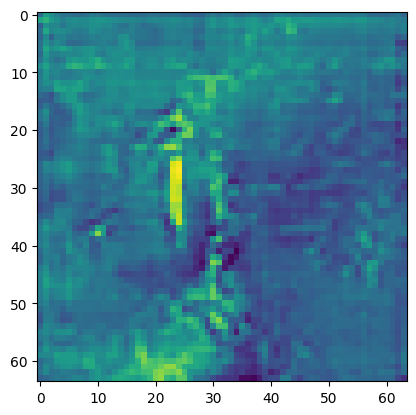

In [ ]:
test_embeds = nepbert.get_bert_embedding_sentence("पोइन्ट पखेटा, औंठीको पखेटा, एक औंठी टेल, र लामो पातलो खाकी",)
test_embeds = test_embeds.detach().cpu().numpy()
noise = tf.random.normal([1, 100])
generated_image = generator((noise,test_embeds.reshape(1,768)), training=False)
plt.imshow(generated_image[0, :, :, 0])

In [ ]:
def test_image(text, num):
  test_embeddings = nepbert.get_bert_embedding_sentence(text,)
  test_embeddings = test_embeddings.detach().cpu().numpy().reshape(1,-1)
  test_embeddings = np.repeat(embeds,[28],axis=0)
  save_images(num, noise, test_embeddings)

In [ ]:
image_array = np.full(( 
      PREVIEW_MARGIN + (PREVIEW_ROWS * (GENERATE_SQUARE+PREVIEW_MARGIN)), 
      PREVIEW_MARGIN + (PREVIEW_COLS * (GENERATE_SQUARE+PREVIEW_MARGIN)), 3), 
      255, dtype=np.uint8)

noise = tf.random.normal([28, 100])
embeds = nepbert.get_bert_embedding_sentence("यो चरा लगभग पूर्ण रूपमा अँध्यारो खैरो छ, यसको हल्का खैरो मुकुट छ",)
embeds = embeds.detach().cpu().numpy().reshape(1,-1)
embeds = np.repeat(embeds,[28],axis=0)
generated_images = generator.predict((noise,embeds))

0 [CLS]
1 यो
2 चरा
3 लगभग
4 पर
5 ##ण
6 र
7 ##पमा
8 अध
9 ##यार
10 ##ो
11 खरो
12 छ
13 ,
14 यसको
15 हल
16 ##का
17 खरो
18 मक
19 ##ट
20 छ
21 [SEP]
1/1 [==============================] - 0s 21ms/step


In [ ]:
image_array = np.full(( 
      PREVIEW_MARGIN + (PREVIEW_ROWS * (GENERATE_SQUARE+PREVIEW_MARGIN)), 
      PREVIEW_MARGIN + (PREVIEW_COLS * (GENERATE_SQUARE+PREVIEW_MARGIN)), 3), 
      255, dtype=np.uint8)

noise = tf.random.normal([28, 100])
embeds = nepbert.get_bert_embedding_sentence("यो चरा लगभग पूर्ण रूपमा अँध्यारो खैरो छ, यसको हल्का खैरो मुकुट छ",)
embeds = embeds.detach().cpu().numpy().reshape(1,-1)
embeds = np.repeat(embeds,[28],axis=0)
generated_images = generator.predict((noise,embeds))

In [ ]:
generated_images.shape

(28, 64, 64, 3)

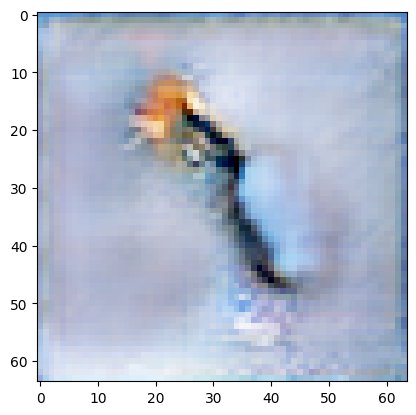

In [ ]:
plt.imshow(generated_images[27])

In [ ]:
image_array = np.full(( 
      PREVIEW_MARGIN + (PREVIEW_ROWS * (GENERATE_SQUARE+PREVIEW_MARGIN)), 
      PREVIEW_MARGIN + (PREVIEW_COLS * (GENERATE_SQUARE+PREVIEW_MARGIN)), 3), 
      255, dtype=np.uint8)

noise = tf.random.normal([28, 100])
embeds = nepbert.get_bert_embedding_sentence("पोइन्ट पखेटा, औंठीको पखेटा, एक औंठी टेल, र लामो पातलो खाकी।",)
embeds = embeds.detach().cpu().numpy().reshape(1,-1)
embeds = np.repeat(embeds,[28],axis=0)
generated_images = generator.predict((noise,embeds))

0 [CLS]
1 पोइ
2 ##न
3 ##ट
4 पख
5 ##टा
6 ,
7 औ
8 ##ठी
9 ##को
10 पख
11 ##टा
12 ,
13 एक
14 औ
15 ##ठी
16 ट
17 ##ल
18 ,
19 र
20 लामो
21 पातलो
22 खा
23 ##की
24 ।
25 [SEP]
1/1 [==============================] - 0s 23ms/step


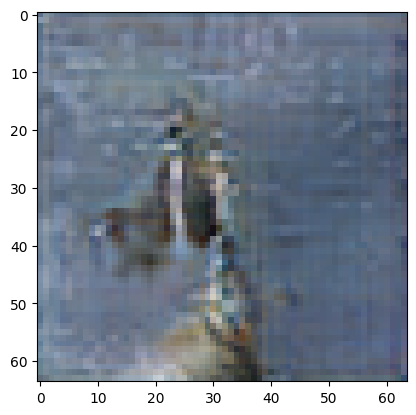

In [ ]:
plt.imshow(generated_images[27])

0 [CLS]
1 एक
2 सानो
3 ,
4 सन
5 ##तला
6 मक
7 ##ट
8 ,
9 कलर
10 र
11 सत
12 ##नको
13 साथ
14 एक
15 सानो
16 ,
17 परा
18 ##य
19 ##ः
20 कालो
21 चरा
22 ।
23 [SEP]
1/1 [==============================] - 0s 37ms/step


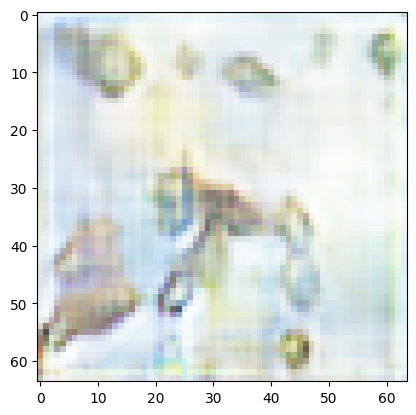

In [ ]:
test_image("एक सानो, सुन्तला मुकुट, कलर र स्तनको साथ एक सानो, प्रायः कालो चरा।",2)